# Rainfall Weather Forecasting

Problem Statement:

In this project, on the basis of several independent features, we are going to predict:
    
a) whether or not it will rain tomorrow.
b) how much rainfall could be there.

In [92]:
#Importing Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [93]:
#Loading the dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [94]:
#Checking first 10 rows of the dataset

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Exploratory Data Analysis (EDA)

In [95]:
#Checking the shape of the dataset

df.shape

(8425, 23)

There are a total of 8425 rows and 23 columnns.

In [96]:
#Checking the Info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

From the above result, we can conclude that the percentage of numerical columns is higher than that of categorical columns.

In [97]:
#Checking the null-values in the dataset

df.isnull().sum().sort_values(ascending=False)

Sunshine         3994
Evaporation      3512
Cloud3pm         2455
Cloud9am         2421
Pressure3pm      1312
Pressure9am      1309
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
RainToday         240
Rainfall          240
RainTomorrow      239
WindSpeed3pm      107
Humidity3pm       102
Temp3pm            96
WindSpeed9am       76
MinTemp            75
MaxTemp            60
Humidity9am        59
Temp9am            56
Location            0
Date                0
dtype: int64

In [98]:
#Let's divide the dataset into categorical and numerical columns on the basis of the data type

categorical_col=[]
for i in df.dtypes.index:
    if df[i].dtypes==object:
        categorical_col.append(i)
        
print("Categorical Columns present in the dataset: ", categorical_col)
print('\n')
print('*'*100)
print('\n')

numerical_col=[]
for i in df.dtypes.index:
    if df[i].dtypes!=object:
        numerical_col.append(i)
        
print("Numerical Columns present in the dataset: ", numerical_col)

Categorical Columns present in the dataset:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


****************************************************************************************************


Numerical Columns present in the dataset:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [99]:
for i in categorical_col:
    df[i]=df[i].fillna(df[i].mode()[0])

In [100]:
for i in numerical_col:
    df[i]=df[i].fillna(df[i].mean())

In [101]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<Axes: >

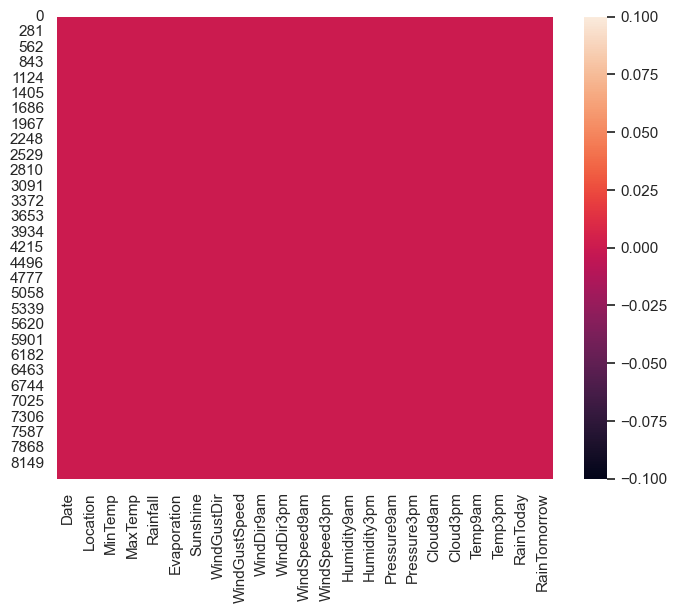

In [102]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [103]:
df['Date']=pd.to_datetime(df['Date'])

In [104]:
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)

In [105]:
df.drop(['Date'],axis=1,inplace=True)

In [106]:
df.sample(8)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
4747,Melbourne,7.6,18.1,0.0,2.000000,4.900000,N,28.000000,NW,S,...,1020.700000,7.0,3.000000,10.7,17.5,No,No,20,5,2010
5222,Melbourne,13.1,20.5,0.0,2.200000,2.100000,NW,33.000000,NNE,NNW,...,1010.800000,7.0,4.503183,15.5,20.1,No,No,7,10,2011
3224,Williamtown,11.2,26.9,0.0,10.000000,7.632205,SSE,39.000000,WNW,SE,...,1012.300000,1.0,4.503183,19.6,24.0,No,No,25,11,2016
8297,Darwin,14.5,30.5,0.0,7.000000,11.200000,E,41.000000,E,ENE,...,1013.500000,1.0,2.000000,21.3,29.5,No,No,14,8,2012
6378,Brisbane,14.3,21.3,3.8,1.800000,0.000000,ENE,17.000000,ESE,SE,...,1013.600000,8.0,8.000000,16.9,18.8,Yes,Yes,6,10,2011
7282,PerthAirport,17.4,24.2,36.0,10.200000,4.400000,SSE,43.000000,S,SSE,...,1007.500000,7.0,6.000000,19.7,23.3,Yes,No,13,12,2011
7560,PerthAirport,10.3,28.2,0.0,6.800000,10.900000,E,65.000000,E,E,...,1015.200000,1.0,0.000000,17.9,27.4,No,No,16,9,2012
1858,Newcastle,8.8,22.3,0.5,5.389395,7.632205,N,40.174469,N,SE,...,1015.236075,0.0,0.000000,12.7,21.5,No,No,15,5,2014


In [107]:
#checking the number of unique values in each column of the dataset

df.nunique()

Location          12
MinTemp          286
MaxTemp          332
Rainfall         251
Evaporation      117
Sunshine         141
WindGustDir       16
WindGustSpeed     53
WindDir9am        16
WindDir3pm        16
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      385
Pressure3pm      375
Cloud9am          10
Cloud3pm          10
Temp9am          305
Temp3pm          329
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

In [108]:
#Checking the value counts of each column of the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    print('*'*50)
    print('\n')

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


**************************************************


 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
-1.100000      1
 1.400000      1
-1.400000      1
-1.700000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64


**************************************************


19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: MaxTemp, Length: 332, dtype: int64


**************************************************


0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000   

In [109]:
#Let's divide the dataset into categorical and numerical columns on the basis of the data type

categorical_col=[]
for i in df.dtypes.index:
    if df[i].dtypes==object:
        categorical_col.append(i)
        
print("Categorical Columns present in the dataset: ", categorical_col)
print('\n')
print('*'*100)
print('\n')

numerical_col=[]
for i in df.dtypes.index:
    if df[i].dtypes!=object:
        numerical_col.append(i)
        
print("Numerical Columns present in the dataset: ", numerical_col)

Categorical Columns present in the dataset:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


****************************************************************************************************


Numerical Columns present in the dataset:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [110]:
#Checking the statistical information of the numerical columns in the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.805913,10.309308,0.0,0.000000,0.000000,1.400000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindSpeed9am,8425.0,13.847646,10.128579,0.0,6.000000,13.000000,20.000000,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.000000,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.000000,99.0


From the above result, we can conclude the following: 

1. Most of the columns are normally distributed, with almost equal values for the mean and median.

2. The columns "Rainfall" and "Evaporation" are rightly skewed, while the column "Sunshine" is left skewed.

3. We can see a large difference between the 75th percentile and the maximum values in most of the columns, which indicates the presence of outliers in the dataset.

# Data Visualisation

Univariate and Bivariate Analysis

In [111]:
sns.set()

In [112]:
#Checking the countplots of each categorical columns

categorical_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

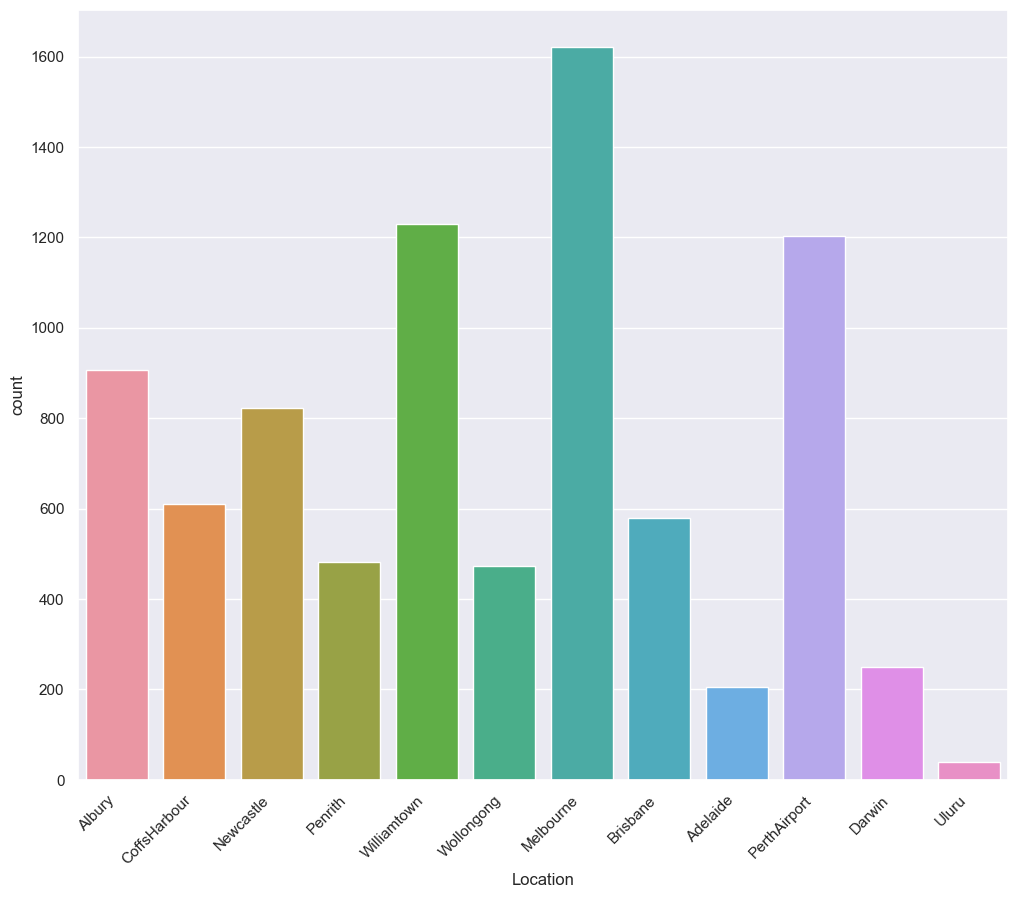

In [113]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Location'],data=df)
plt.xticks(rotation=45,ha='right')
df['Location'].value_counts().sort_values(ascending=False)

The highest rainfall can be observed in Melbourne, followed by Williamtown and Perth Airport, and the lowest in Uluru.

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64

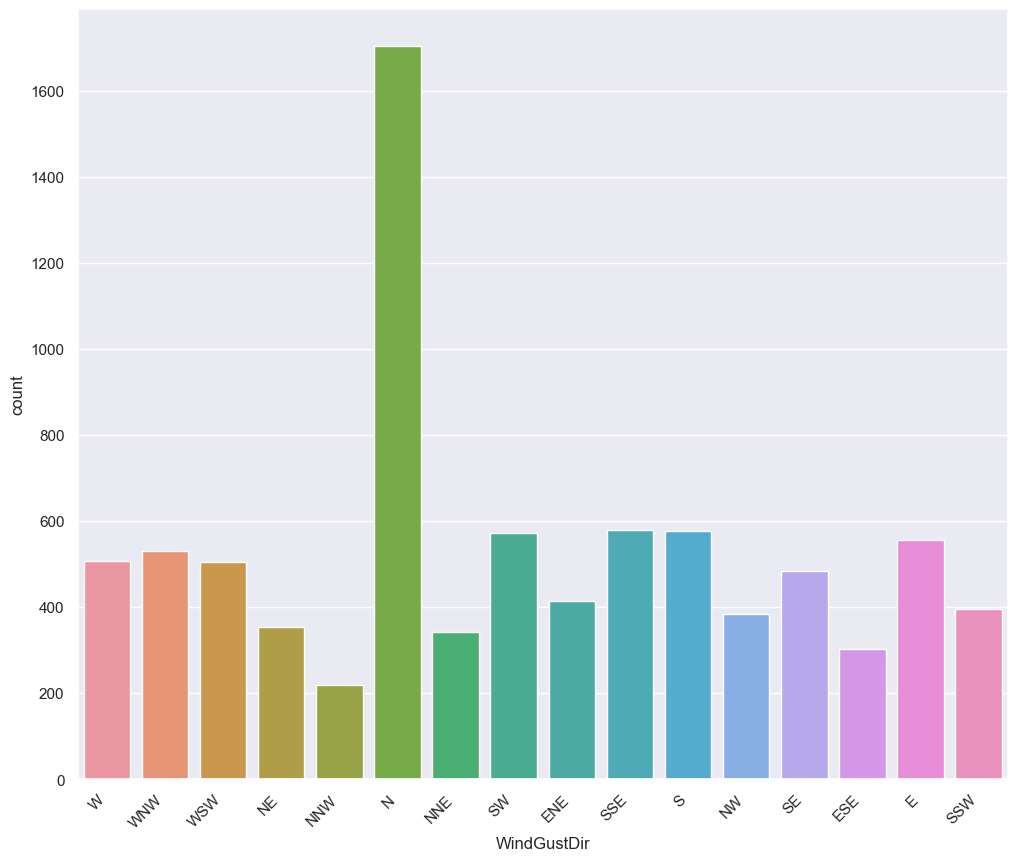

In [114]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['WindGustDir'],data=df)
plt.xticks(rotation=45,ha='right')
df['WindGustDir'].value_counts().sort_values(ascending=False)

The direction of the strongest wind gust can be observed in the north direction, followed by SSE, SW,  and E.

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64

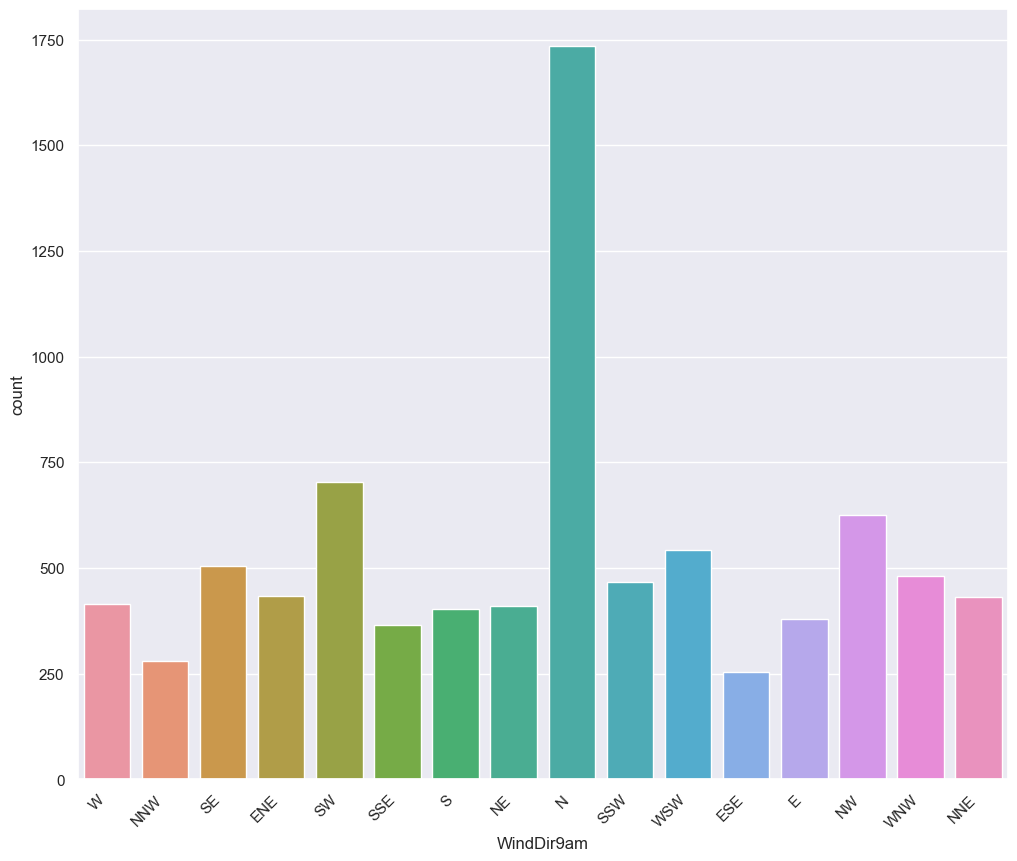

In [115]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['WindDir9am'],data=df)
plt.xticks(rotation=45,ha='right')
df['WindDir9am'].value_counts().sort_values(ascending=False)

We can clearly see that the direction of the wind is in the N direction at 9 am.

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64

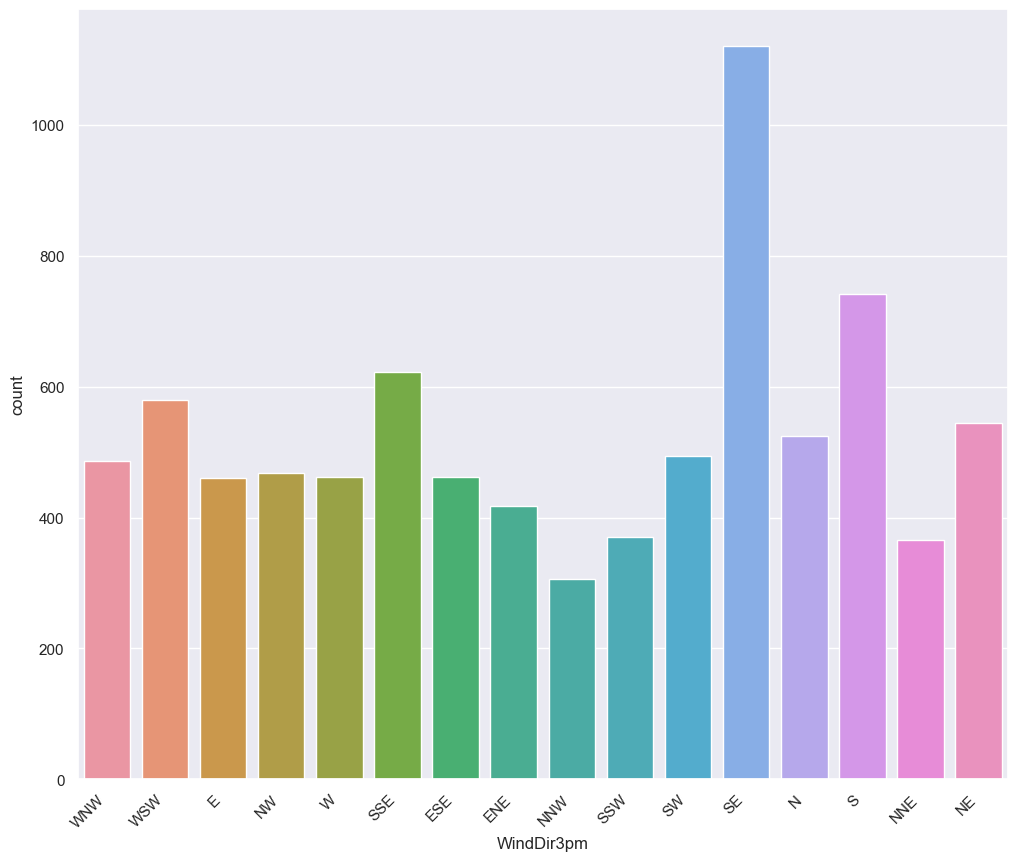

In [116]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['WindDir3pm'],data=df)
plt.xticks(rotation=45,ha='right')
df['WindDir3pm'].value_counts().sort_values(ascending=False)

We can clearly see that the direction of the wind is in the SE direction at 3 pm.

No     6435
Yes    1990
Name: RainToday, dtype: int64

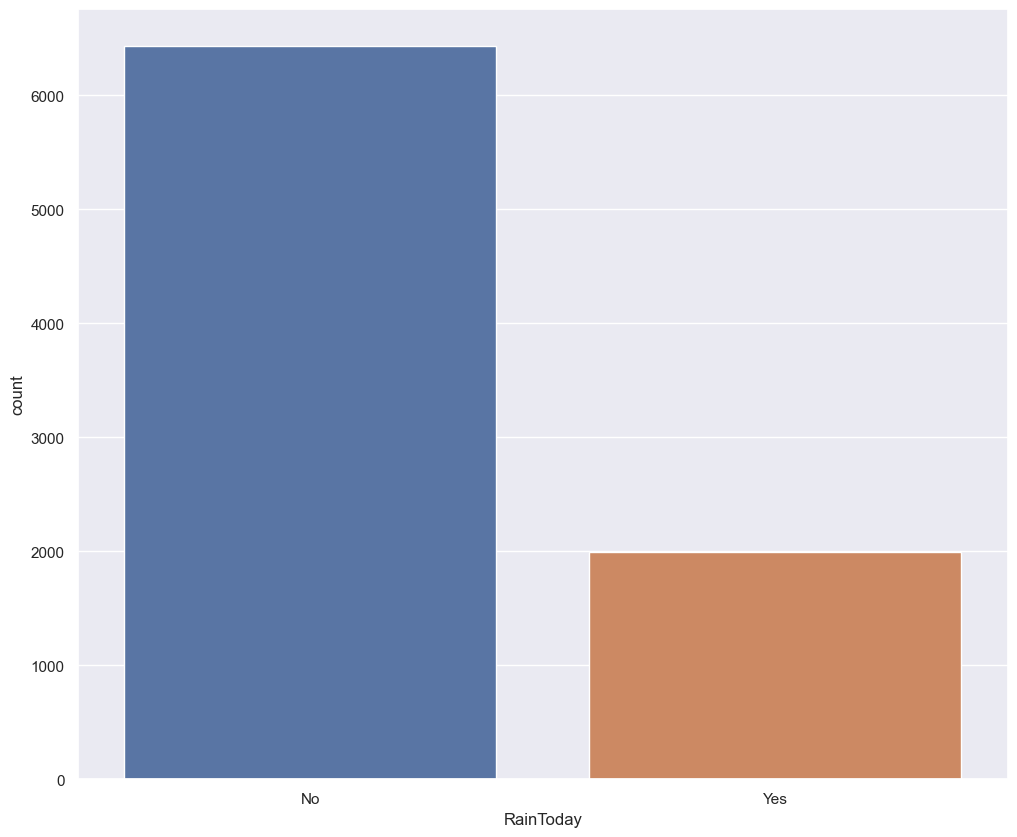

In [117]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['RainToday'],data=df)
df['RainToday'].value_counts().sort_values(ascending=False)

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

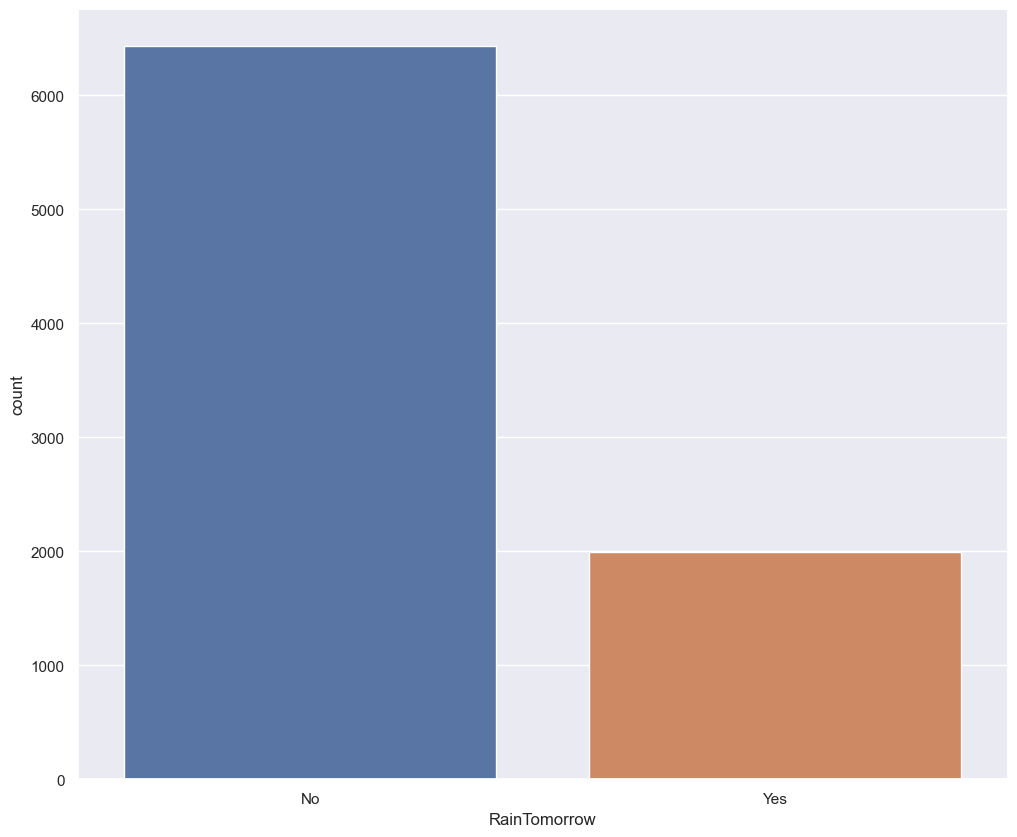

In [118]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['RainTomorrow'],data=df)
df['RainTomorrow'].value_counts().sort_values(ascending=False)

Both plots convey the same information, and there is no difference between them.

In [119]:
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

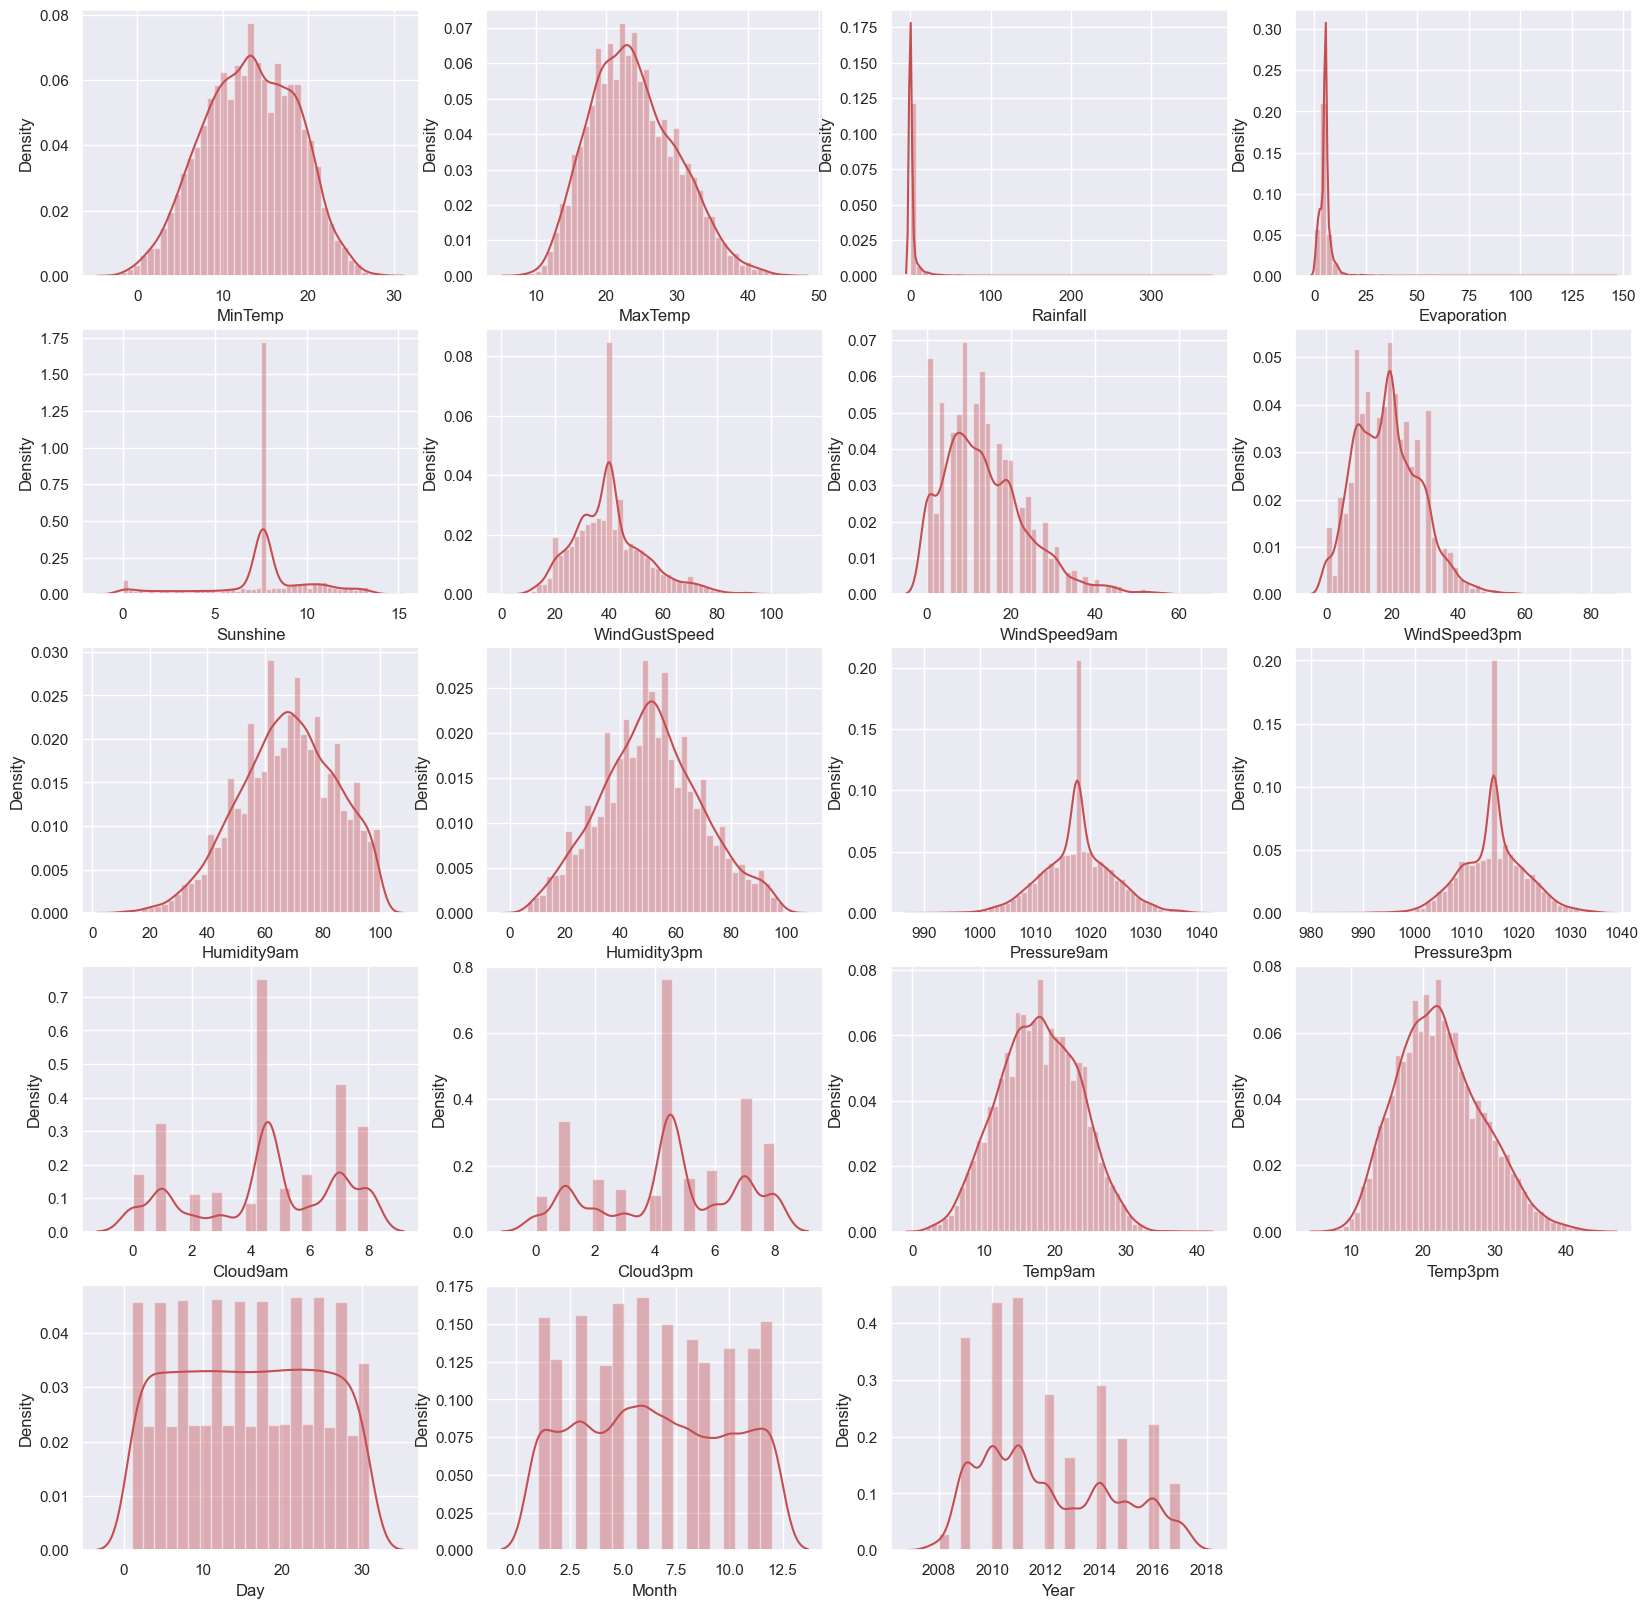

<Figure size 640x480 with 0 Axes>

In [120]:
#Distribution plots of the numerical columns

plt.figure(figsize=(20,20))
p=1
for i in numerical_col:
    if p<=20:
        plt.subplot(5,4,p)
        sns.distplot(df[i],color='r')
    p+=1
plt.show()
plt.tight_layout()

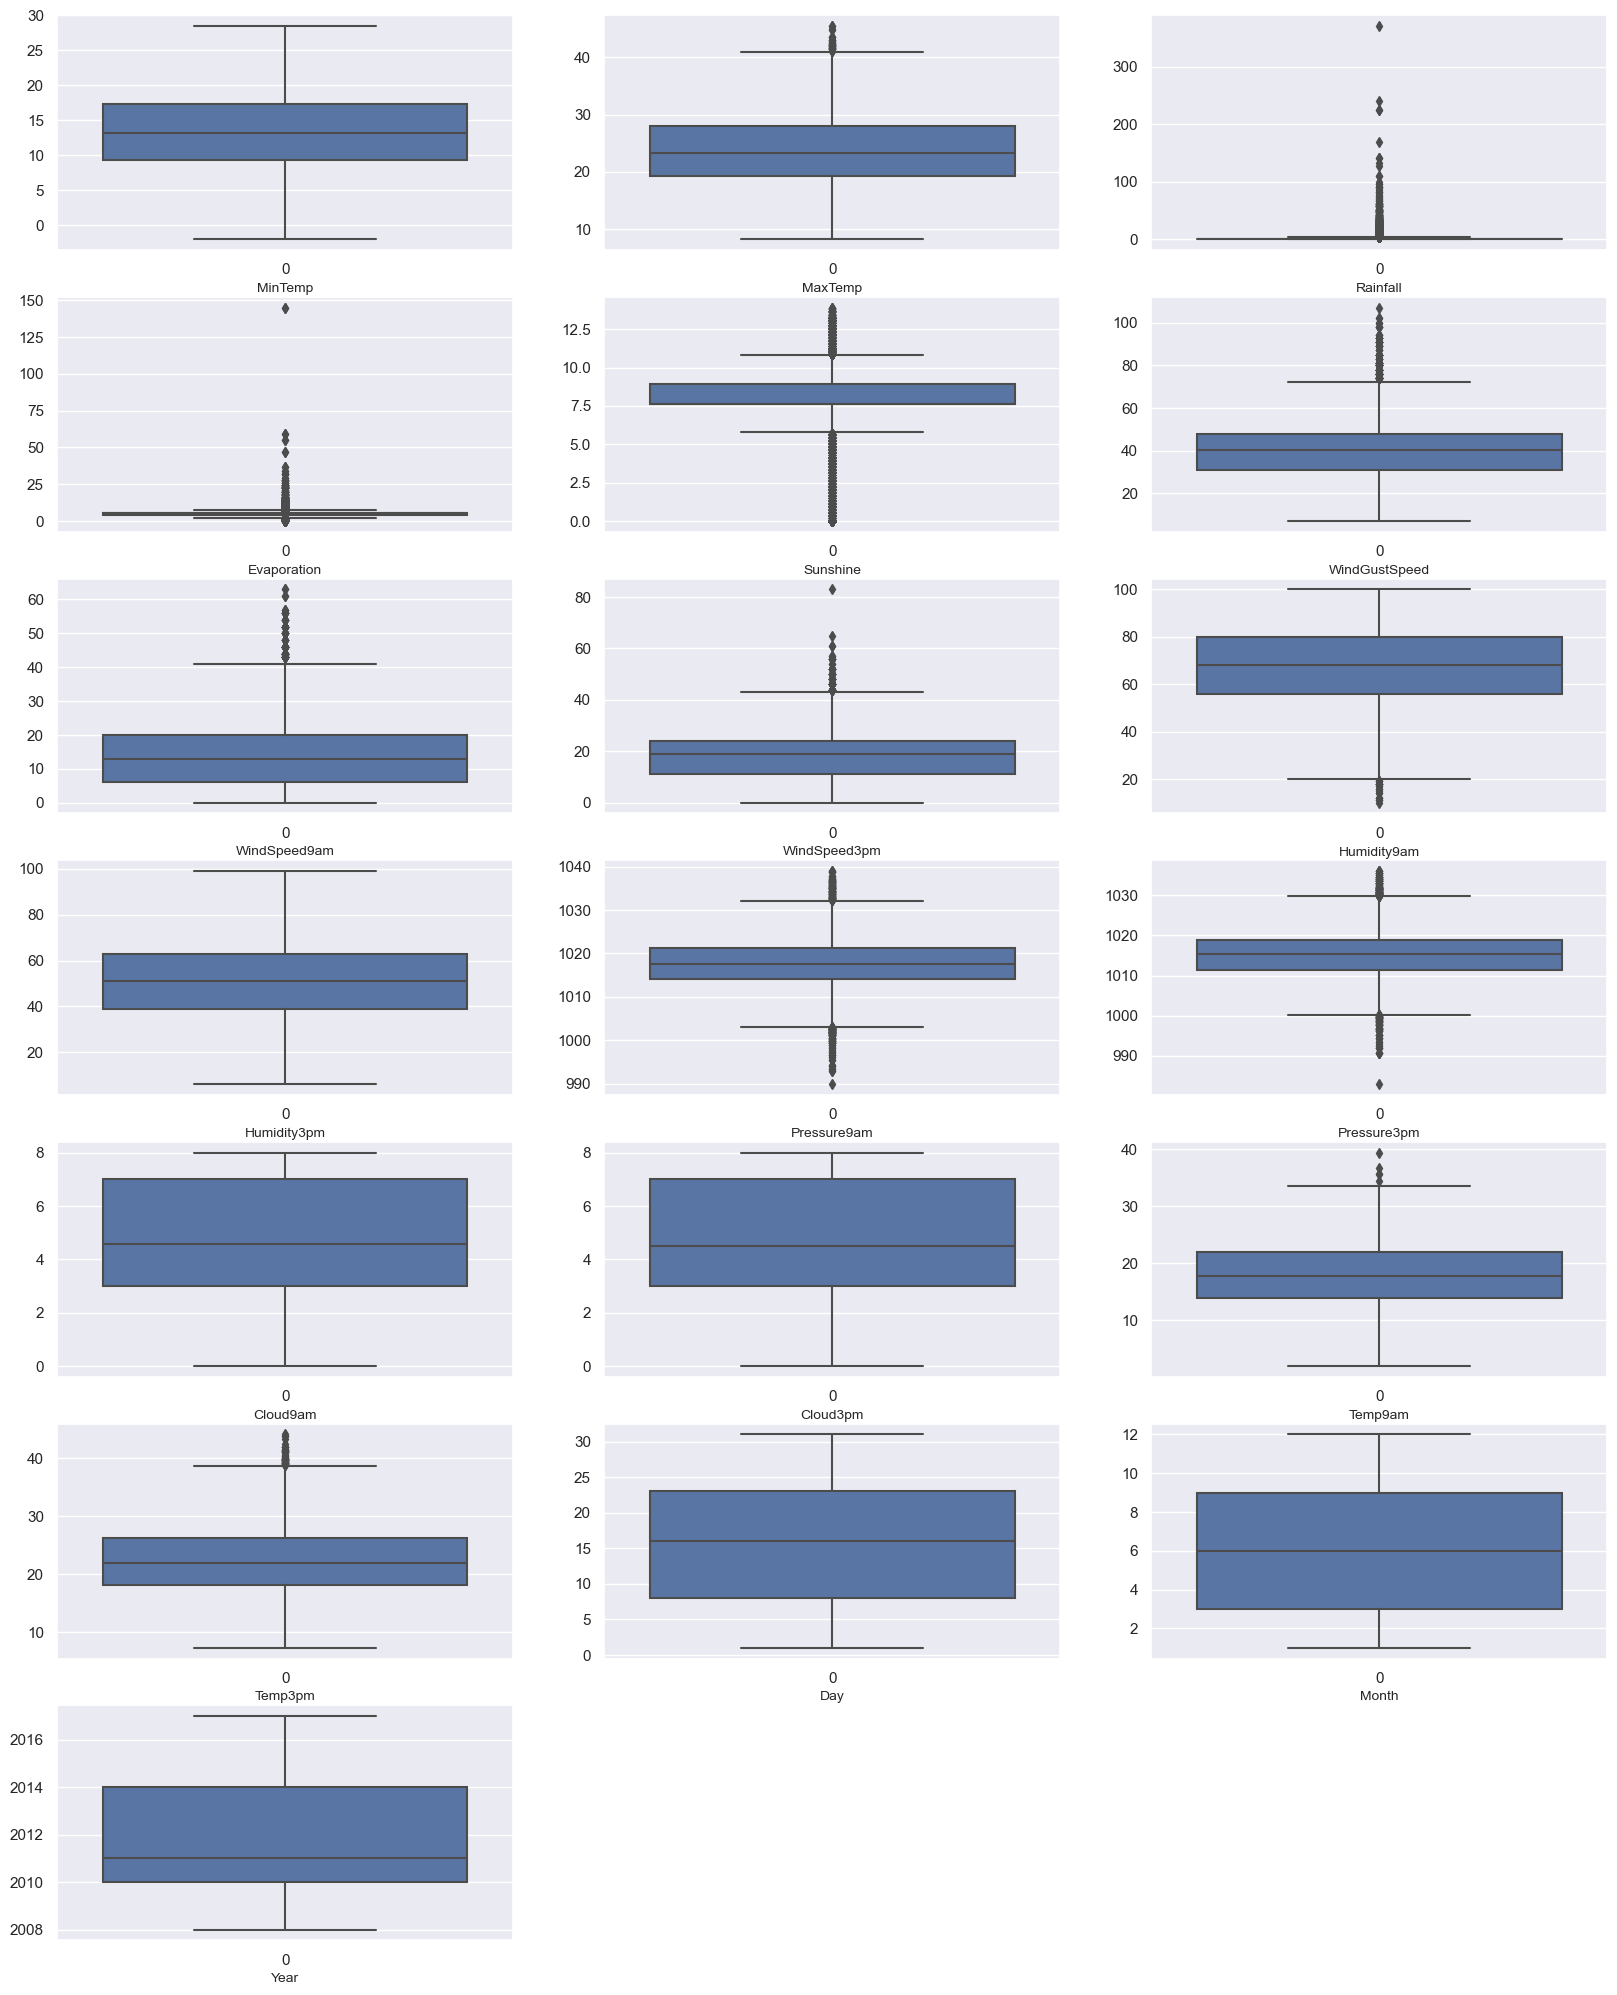

<Figure size 640x480 with 0 Axes>

In [121]:
#Plotting the box plots to check the outliers in the dataset

plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=20:
        plt.subplot(7,3,p)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    p+=1
plt.show()
plt.tight_layout()

The above two plots show the distribution (left/right skewed, or normal) and the presence of outliers in the numerical columns of the dataset.

Plotting the graphs between different features and our target columns 

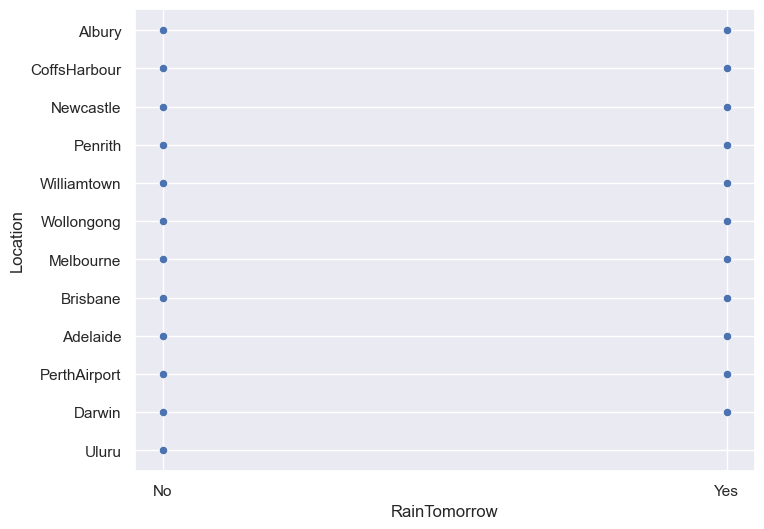

In [122]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainTomorrow'], y=df['Location'])
plt.show()

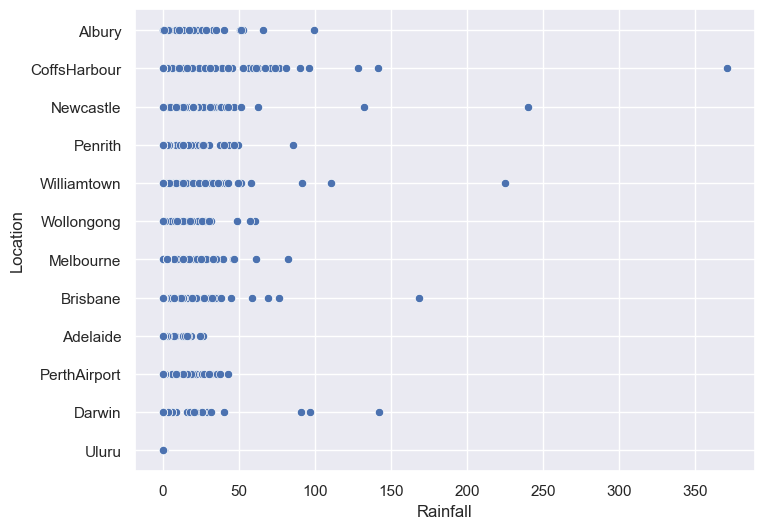

In [123]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Rainfall'], y=df['Location'])
plt.show()

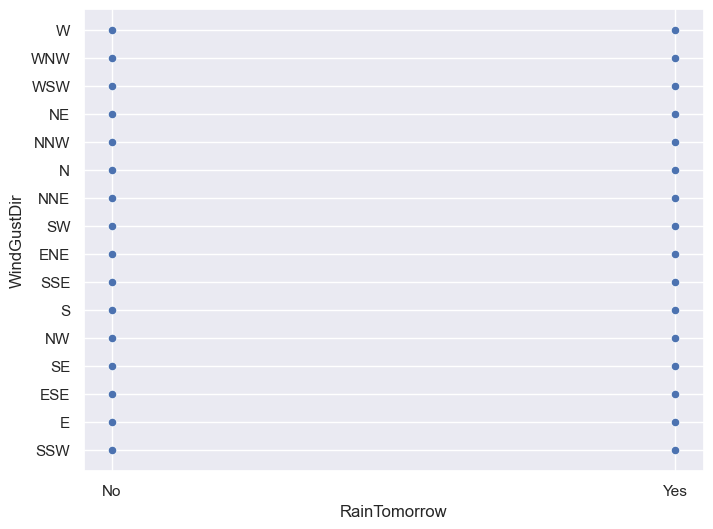

In [124]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainTomorrow'], y=df['WindGustDir'])
plt.show()

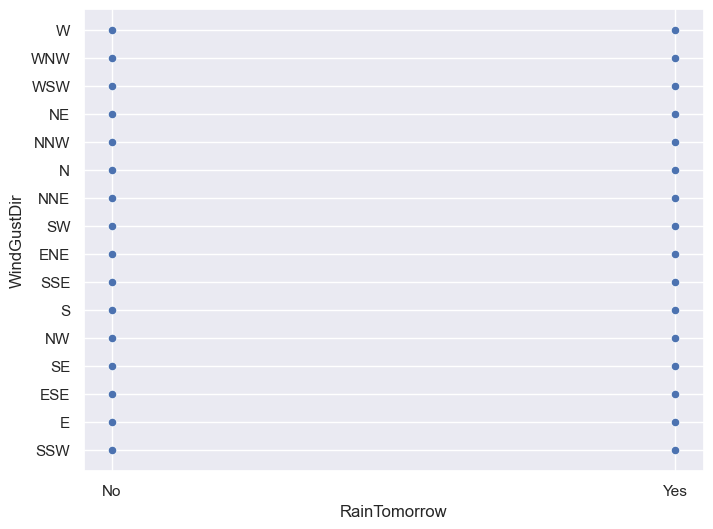

In [125]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainTomorrow'], y=df['WindGustDir'])
plt.show()

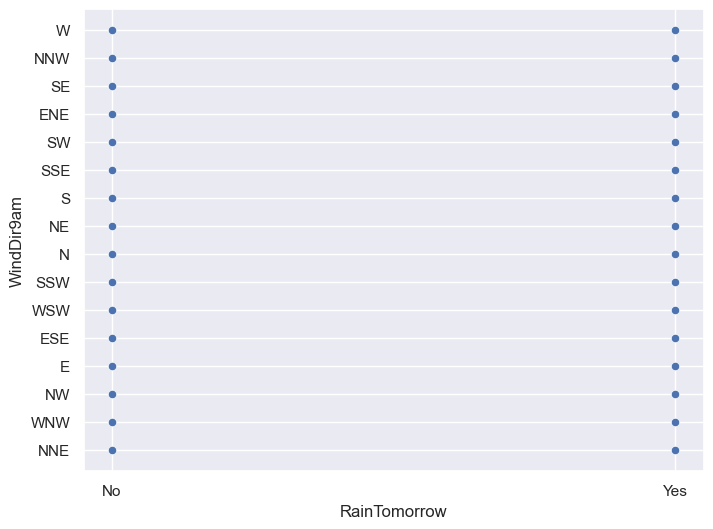

In [126]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainTomorrow'], y=df['WindDir9am'])
plt.show()

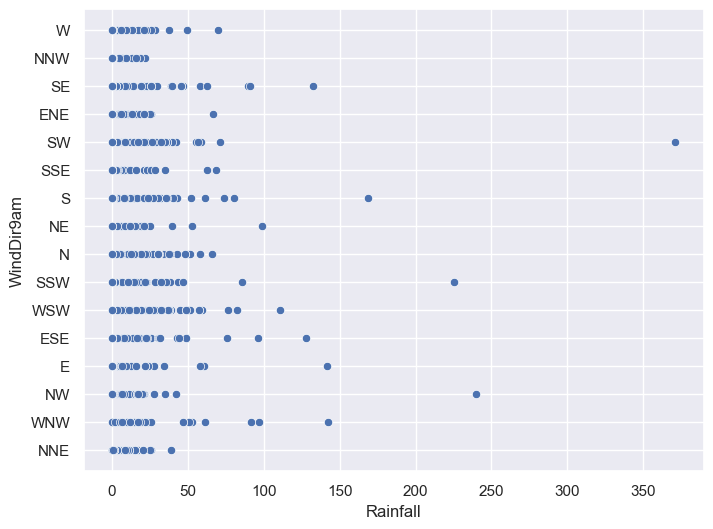

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Rainfall'], y=df['WindDir9am'])
plt.show()

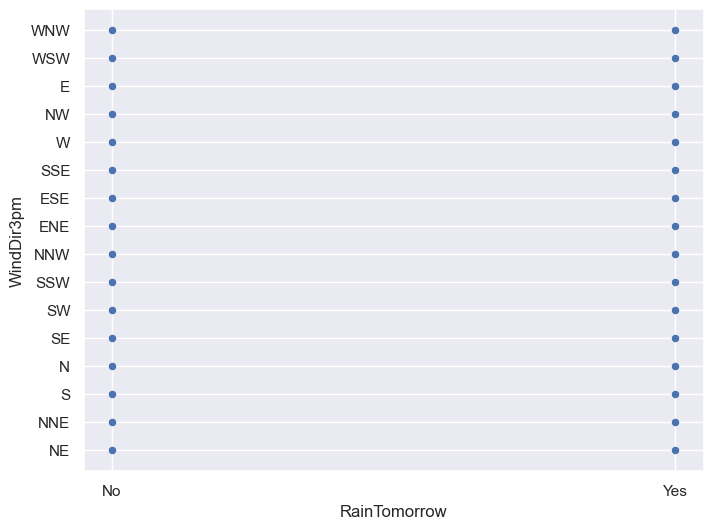

In [128]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainTomorrow'], y=df['WindDir3pm'])
plt.show()

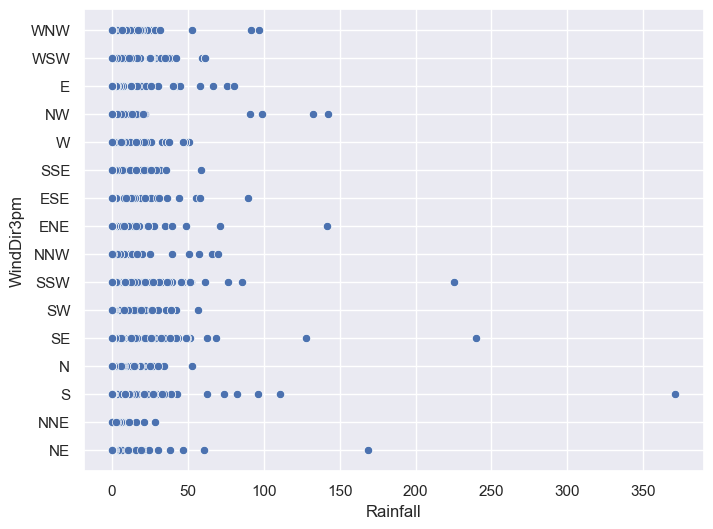

In [129]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Rainfall'], y=df['WindDir3pm'])
plt.show()

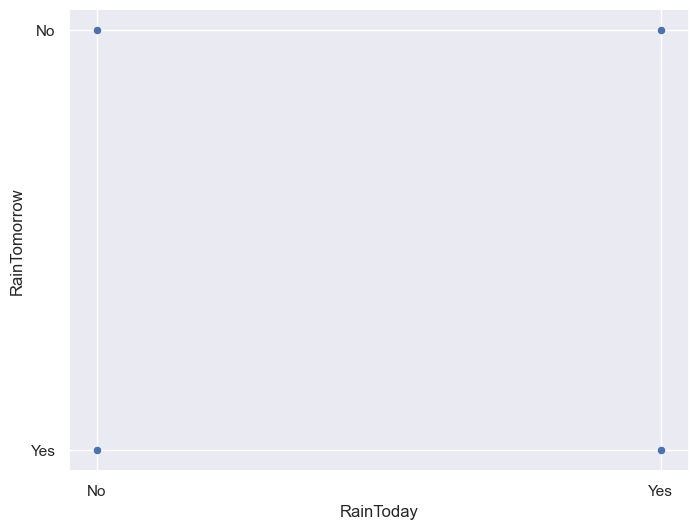

In [130]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'], y=df['RainTomorrow'])
plt.show()

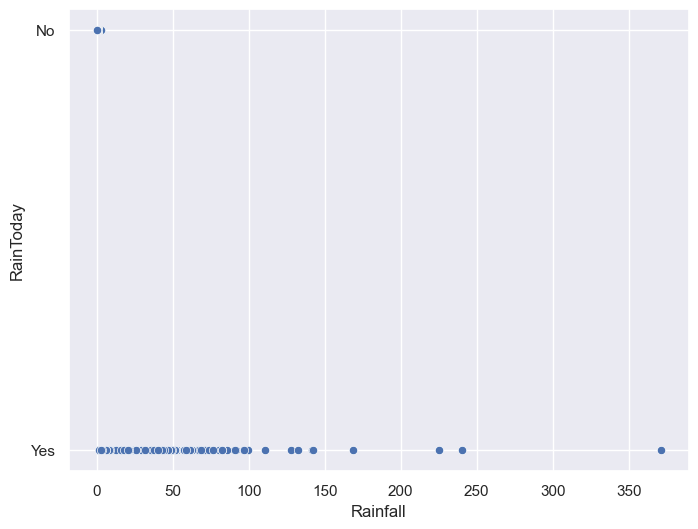

In [131]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Rainfall'], y=df['RainToday'])
plt.show()

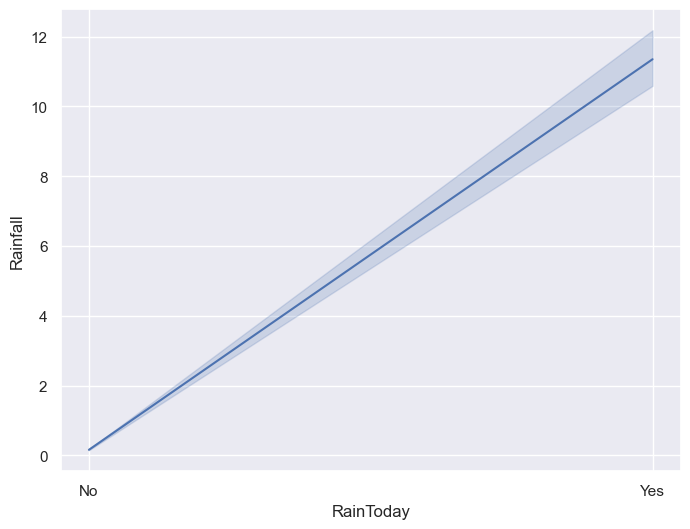

In [132]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['RainToday'], y=df['Rainfall'])
plt.show()

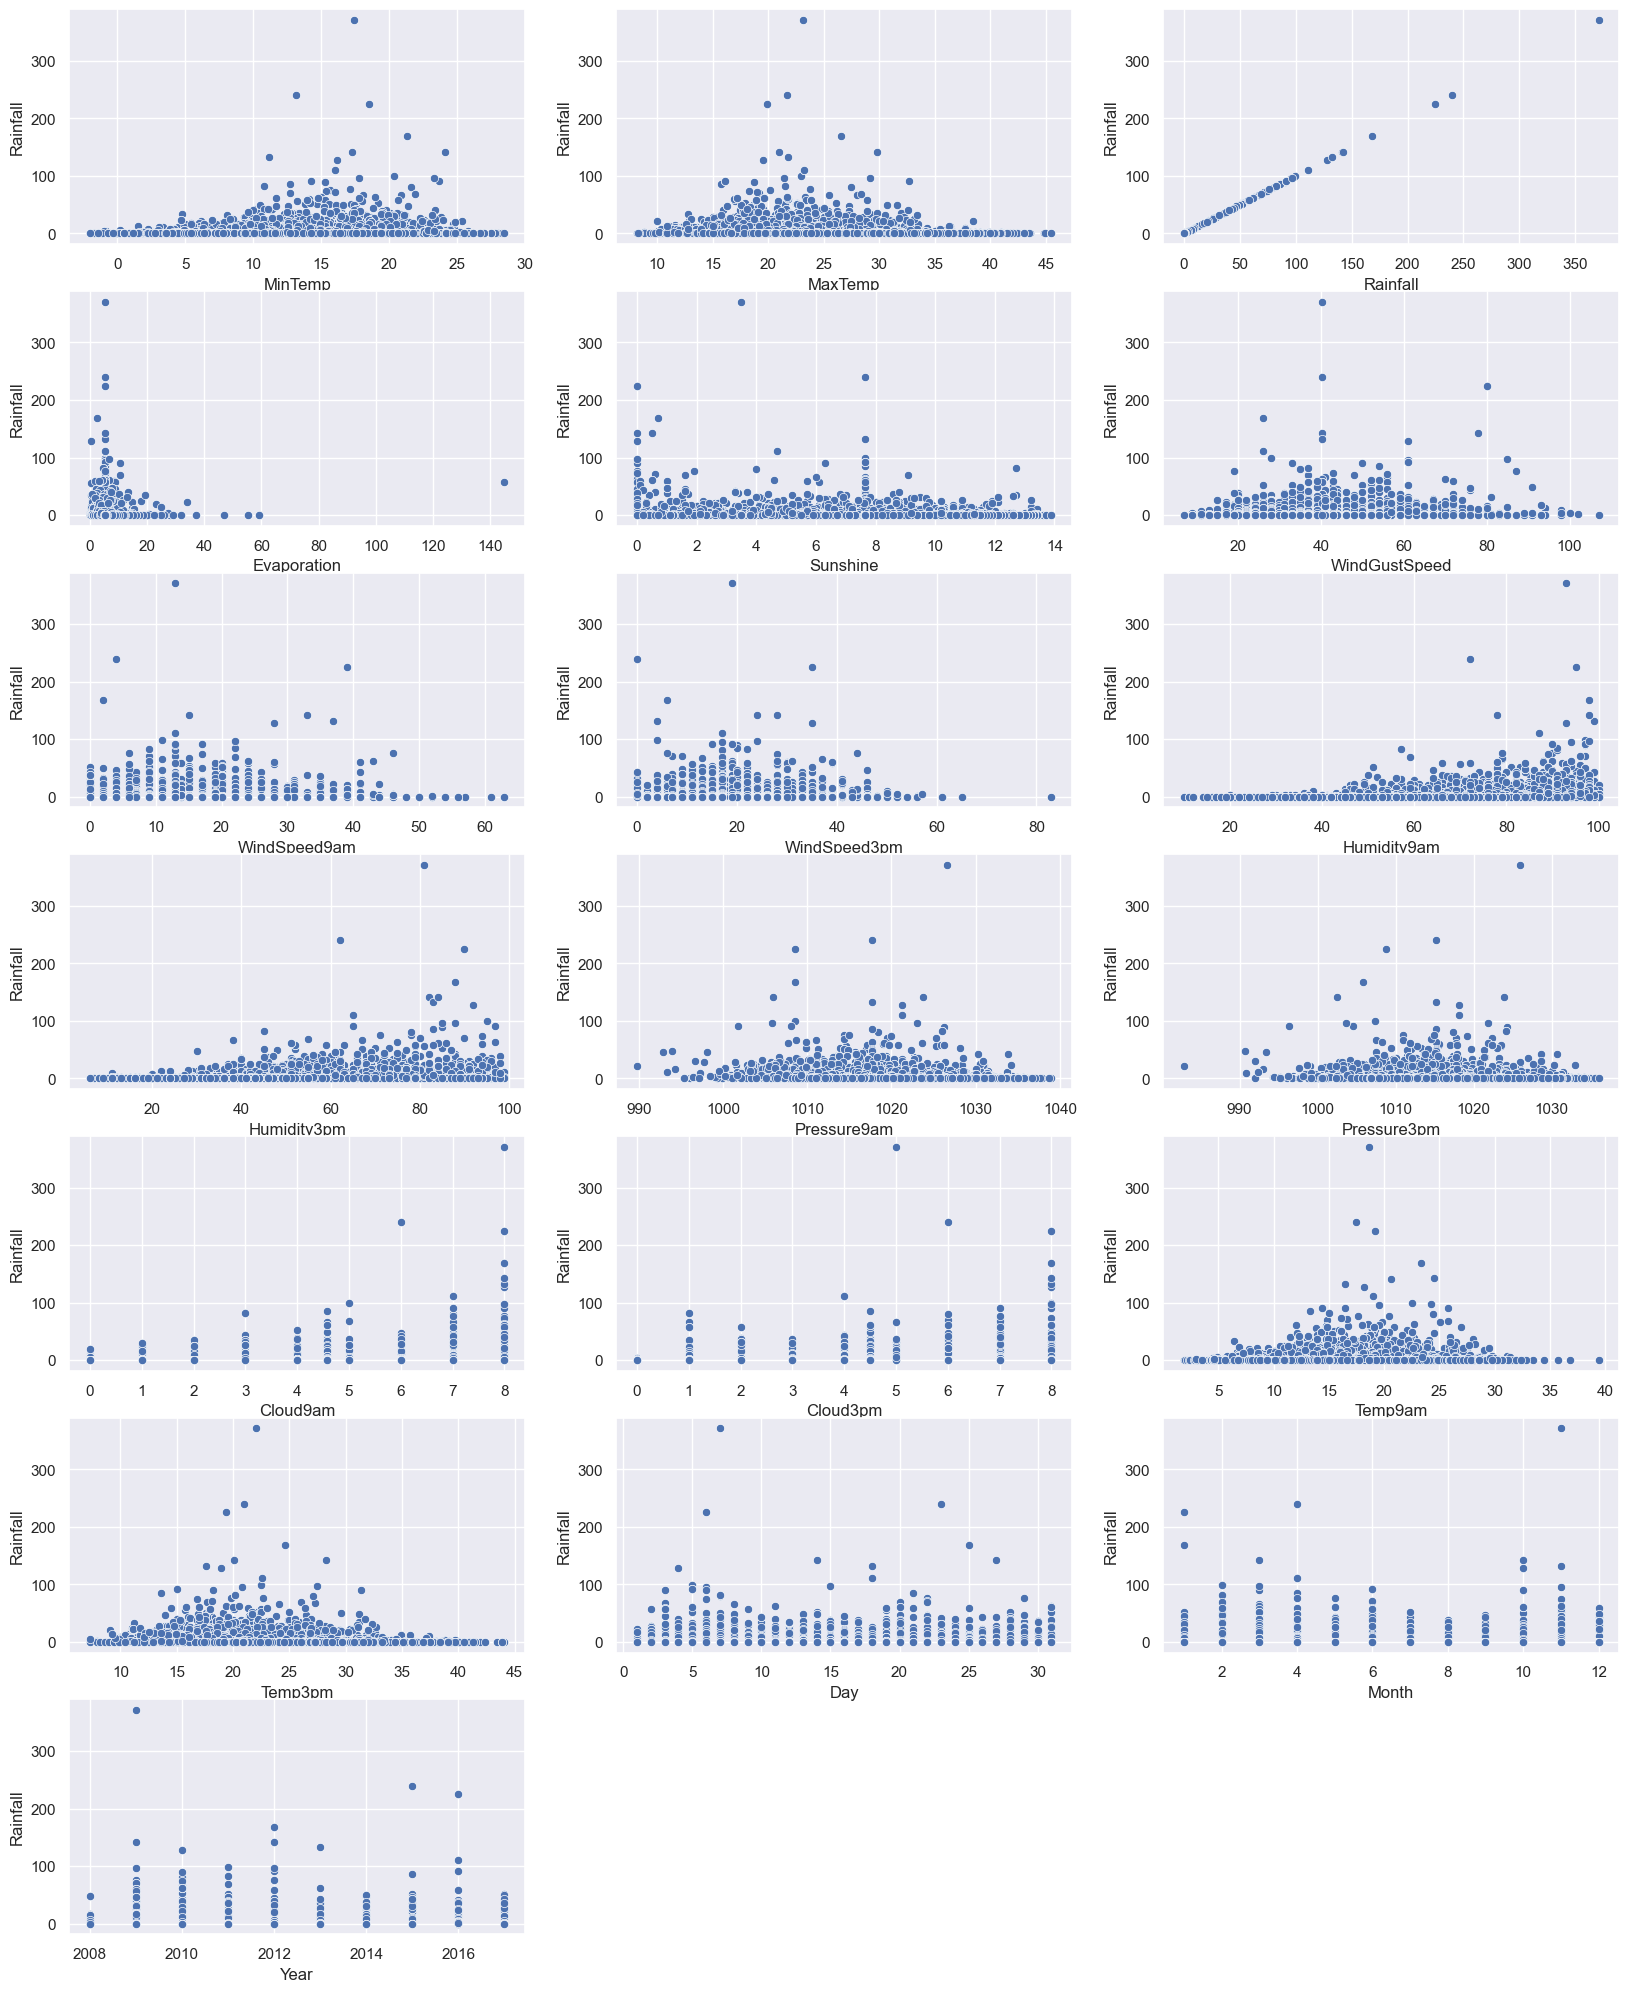

In [133]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=20:
        plt.subplot(7,3,p)
        sns.scatterplot(x=df[i],y=df['Rainfall'])
        plt.xlabel(i,fontsize=12)
    p+=1
plt.show()

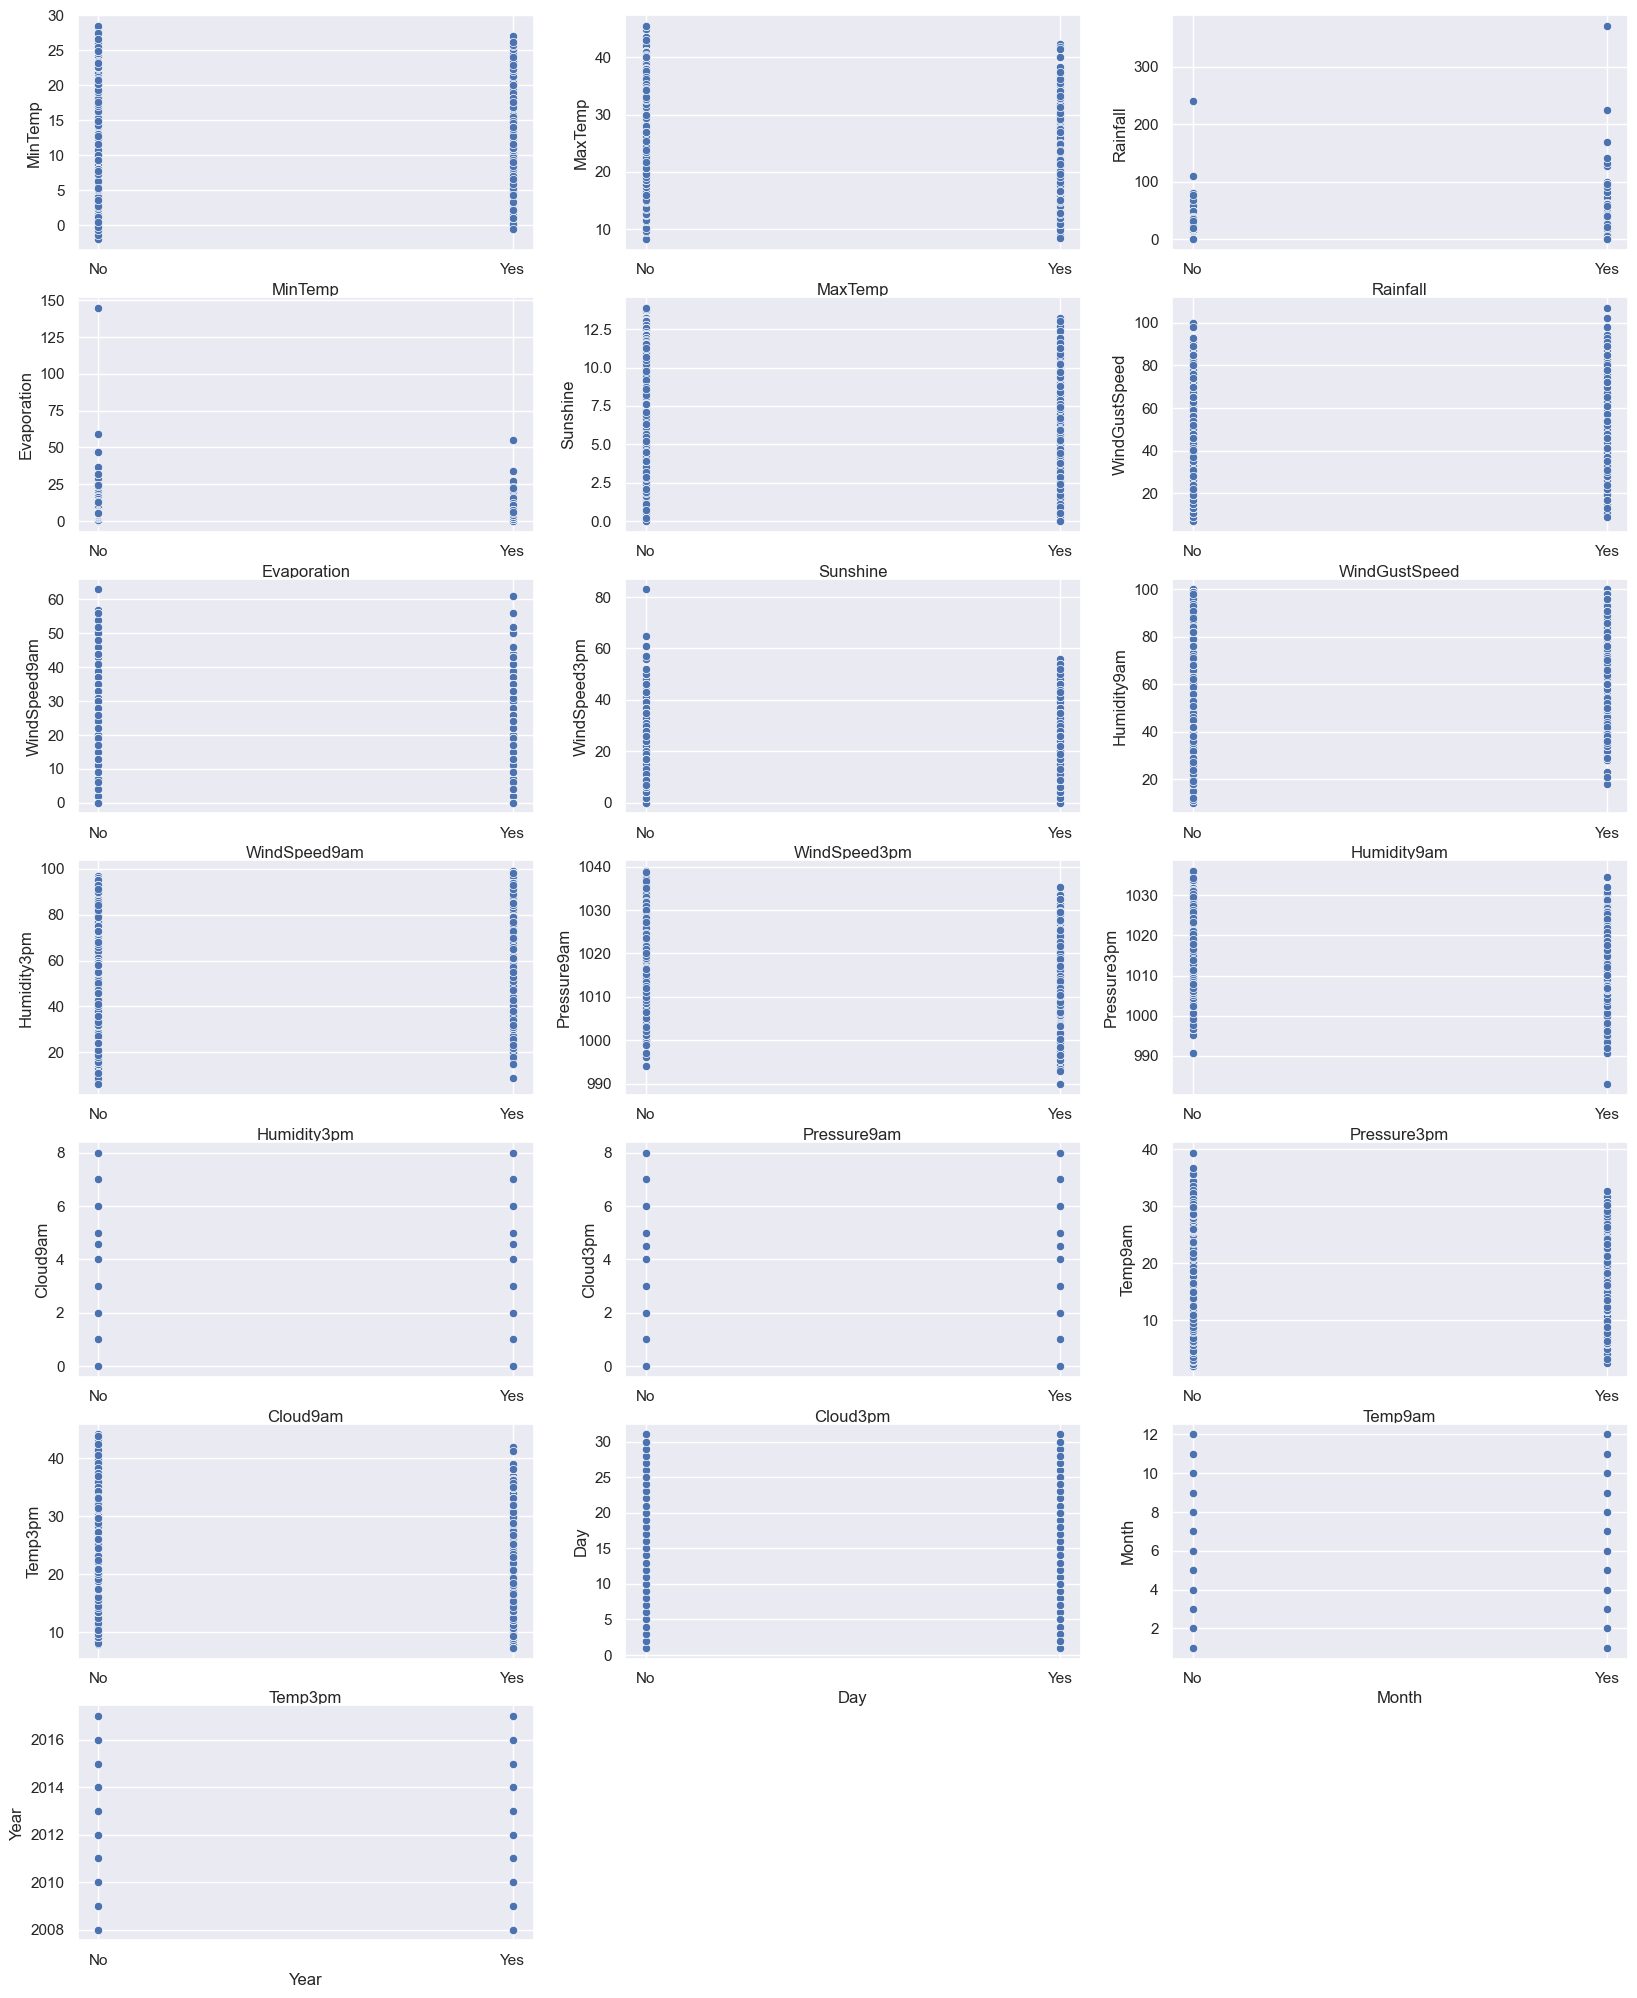

In [134]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=20:
        plt.subplot(7,3,p)
        sns.scatterplot(x=df['RainTomorrow'],y=df[i])
        plt.xlabel(i,fontsize=12)
    p+=1
plt.show()

Removing Outliers

In [135]:
from scipy.stats import zscore
features=df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z=np.abs(zscore(features))
z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.213986,2.305893e-16,3.143679e-16,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.272189,2.305893e-16,3.143679e-16,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.272189,2.305893e-16,3.143679e-16,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.272189,2.305893e-16,3.143679e-16,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.175183,2.305893e-16,3.143679e-16,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.272189,2.305893e-16,3.143679e-16,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.272189,2.305893e-16,3.143679e-16,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.272189,2.305893e-16,3.143679e-16,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.272189,2.305893e-16,3.143679e-16,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [136]:
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [137]:
df1=df[(z<3).all(axis=1)]

In [138]:
df1.shape[0]

7987

In [139]:
df.shape[0]

8425

In [140]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100

5.198813056379822

In [141]:
df=df[(z<3).all(axis=1)]
df.shape

(7987, 25)

Checking the skewness of the dataset

In [142]:
df.skew().sort_values(ascending=False)

Rainfall         3.488446
Evaporation      0.846181
WindSpeed9am     0.711395
WindGustSpeed    0.506897
Year             0.430100
Temp3pm          0.334170
MaxTemp          0.314510
WindSpeed3pm     0.300109
Humidity3pm      0.125150
Month            0.054460
Pressure3pm      0.044876
Pressure9am      0.020735
Day              0.002731
Temp9am         -0.038035
MinTemp         -0.084549
Humidity9am     -0.231656
Cloud3pm        -0.266829
Cloud9am        -0.356892
Sunshine        -0.723970
dtype: float64

We can see that the columns Rainfall, Evaporation, Wind Speed9am, WindGustSpeed, and Sunshine have skewness present in them.

In [143]:
df["Sunshine"] = np.log1p(df["Sunshine"])
df["Rainfall"] = np.log1p(df["Rainfall"])
df["Evaporation"] = np.log1p(df["Evaporation"])
df["WindSpeed9am"] = np.log1p(df["WindSpeed9am"])
df["WindGustSpeed"] = np.log1p(df["WindGustSpeed"])

In [144]:
df.skew().sort_values(ascending=False)

Rainfall         1.662475
Year             0.430100
Temp3pm          0.334170
MaxTemp          0.314510
WindSpeed3pm     0.300109
Humidity3pm      0.125150
Month            0.054460
Pressure3pm      0.044876
Pressure9am      0.020735
Day              0.002731
Temp9am         -0.038035
MinTemp         -0.084549
Humidity9am     -0.231656
Cloud3pm        -0.266829
Cloud9am        -0.356892
WindGustSpeed   -0.526267
Evaporation     -0.993594
WindSpeed9am    -1.186810
Sunshine        -2.460672
dtype: float64

Encoding the categorical columns

In [145]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(le.fit_transform)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


In [146]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.024150,0.123801,0.068152,-0.037707,0.263202,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.090532,0.355551,0.008673,-0.154935,0.262663,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.203744,0.458312,0.316812,-0.237955,0.163935,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.024150,0.090532,-0.203744,1.000000,-0.159658,-0.200288,0.124443,0.101757,0.151125,0.105500,...,-0.046931,0.284774,0.241878,-0.075411,-0.214122,0.870494,0.319771,-0.019775,0.016418,0.013951
Evaporation,0.123801,0.355551,0.458312,-0.159658,1.000000,0.349285,-0.116103,0.154434,-0.096182,-0.039583,...,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.068152,0.008673,0.316812,-0.200288,0.349285,1.000000,-0.073069,0.002758,-0.054298,-0.049383,...,-0.035891,-0.438407,-0.460418,0.182254,0.332749,-0.187463,-0.293951,-0.000143,-0.001379,0.115062
WindGustDir,-0.037707,-0.154935,-0.237955,0.124443,-0.116103,-0.073069,1.000000,-0.002519,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.263202,0.262663,0.163935,0.101757,0.154434,0.002758,-0.002519,1.000000,-0.059409,0.086693,...,-0.322502,0.001923,0.053528,0.237165,0.130016,0.075067,0.161878,-0.005867,0.048639,-0.014468
WindDir9am,-0.041030,-0.045231,-0.217160,0.151125,-0.096182,-0.054298,0.405681,-0.059409,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.105500,-0.039583,-0.049383,0.507292,0.086693,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


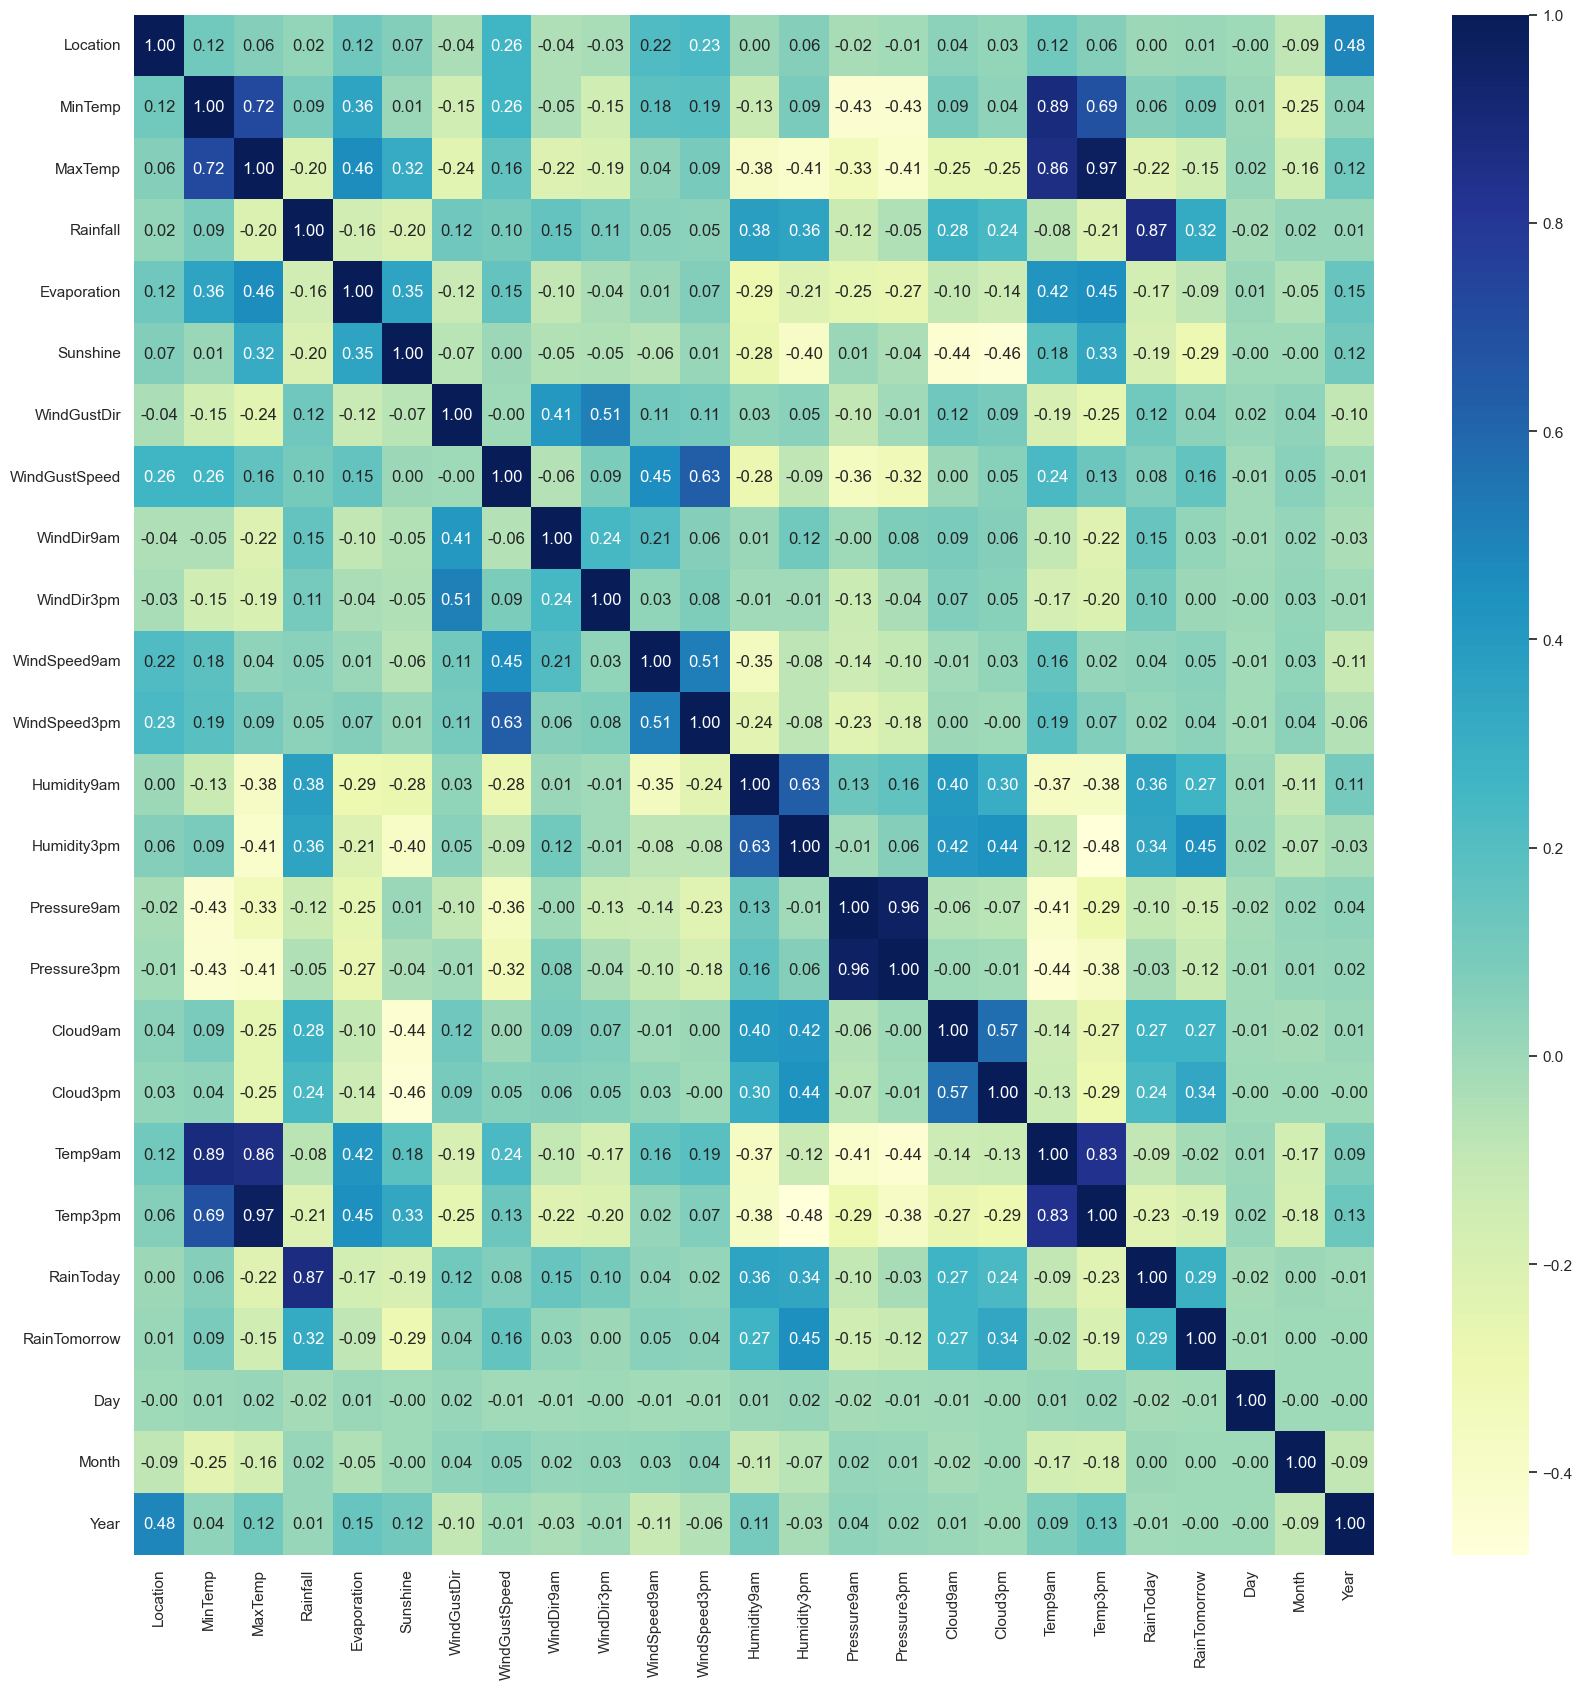

In [147]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), fmt='0.2f', annot=True, cmap='YlGnBu')
plt.show()

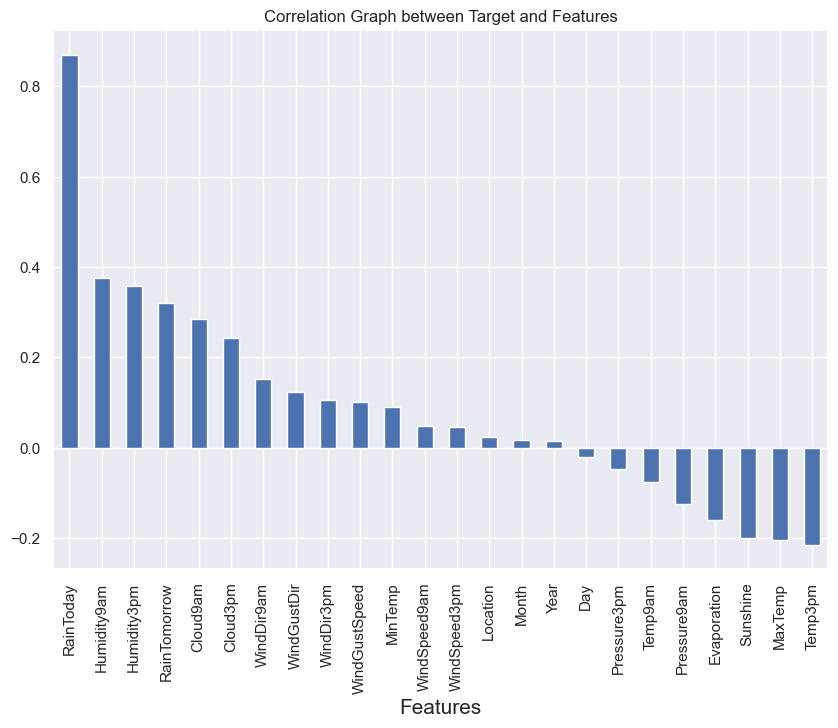

In [148]:
plt.figure(figsize=(10,7))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot.bar()
plt.title("Correlation Graph between Target and Features")
plt.xlabel("Features",fontsize=15)
plt.show()

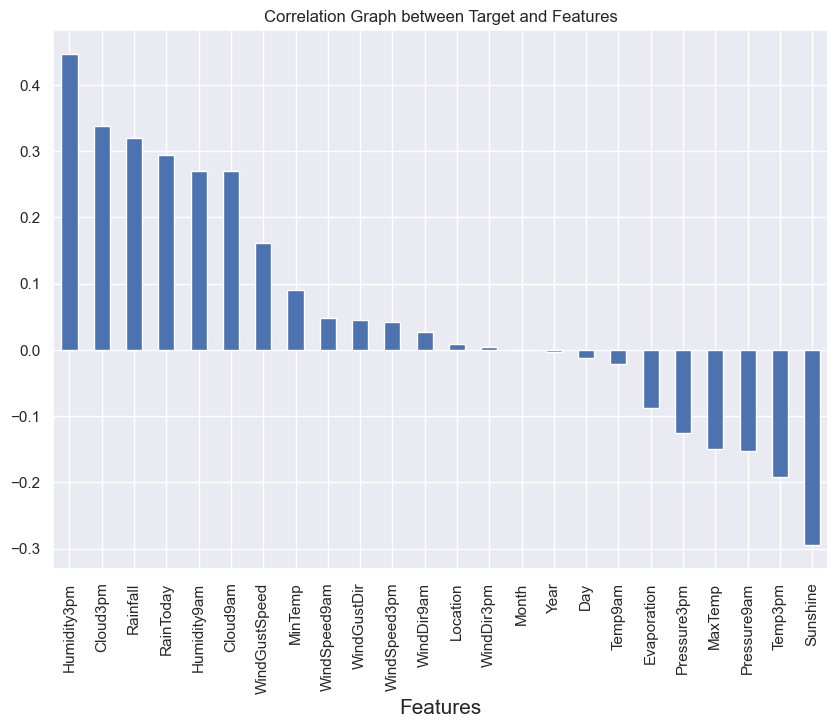

In [149]:
plt.figure(figsize=(10,7))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot.bar()
plt.title("Correlation Graph between Target and Features")
plt.xlabel("Features",fontsize=15)
plt.show()

# Prediction for Rain-Tomorrow

In [59]:
X = df.drop("RainTomorrow", axis=1)
Y = df["RainTomorrow"]

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.045414,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.582854,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.582854,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.582854,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.209747,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.582854,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.582854,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.582854,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.582854,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


VIF (Variance Inflation Factor)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.591968,Location
1,8.781463,MinTemp
2,26.333251,MaxTemp
3,4.410661,Rainfall
4,1.506449,Evaporation
5,1.633507,Sunshine
6,1.621678,WindGustDir
7,2.157264,WindGustSpeed
8,1.397092,WindDir9am
9,1.493330,WindDir3pm


In [63]:
# Dropping Temp3pm column
X.drop("Temp3pm",axis=1,inplace=True)

In [64]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.590930,Location
1,8.744287,MinTemp
2,9.611392,MaxTemp
3,4.408308,Rainfall
4,1.504549,Evaporation
5,1.632529,Sunshine
6,1.618530,WindGustDir
7,2.149977,WindGustSpeed
8,1.396496,WindDir9am
9,1.492266,WindDir3pm


In [65]:
# Dropping Pressure9am column
X.drop("Pressure9am",axis=1,inplace=True)

In [66]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.590825,Location
1,8.604522,MinTemp
2,9.197574,MaxTemp
3,4.383537,Rainfall
4,1.492071,Evaporation
5,1.632192,Sunshine
6,1.603833,WindGustDir
7,2.131447,WindGustSpeed
8,1.373014,WindDir9am
9,1.425913,WindDir3pm


In [67]:
# Dropping Temp9am column
X.drop("Temp9am",axis=1,inplace=True)

In [68]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.589132,Location
1,4.547857,MinTemp
2,5.352485,MaxTemp
3,4.383514,Rainfall
4,1.486563,Evaporation
5,1.627442,Sunshine
6,1.601900,WindGustDir
7,2.091678,WindGustSpeed
8,1.372706,WindDir9am
9,1.425643,WindDir3pm


Oversampling

In [69]:
Y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [71]:
Y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

Finding the best random state

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [73]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"at Random State =",maxRS)

Best accuracy is  0.7921059745877264 at Random State = 95


In [74]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=95,test_size=.30)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [77]:
for m in model:
    m.fit(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Accuracy Score of the training data is', m.score(x_train,y_train)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*100)

Accuracy Score of  LogisticRegression() is 79.21059745877264
Accuracy Score of the training data is 76.2252346193952
Confusion Matrix of  LogisticRegression()  is 
 [[1472  390]
 [ 379 1458]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1862
           1       0.79      0.79      0.79      1837

    accuracy                           0.79      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.79      0.79      0.79      3699

****************************************************************************************************
Accuracy Score of  RidgeClassifier() is 78.94025412273588
Accuracy Score of the training data is 75.99351175993512
Confusion Matrix of  RidgeClassifier()  is 
 [[1490  372]
 [ 407 1430]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1862
           1       0.79      0.78      0.79      1837

    accuracy                 

Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Accuracy_Score of  LogisticRegression() is 79.21059745877264
cross Validation accuracy score of  LogisticRegression()  is  71.68694241686943


**************************************************


Accuracy_Score of  RidgeClassifier() is 78.94025412273588
cross Validation accuracy score of  RidgeClassifier()  is  71.96269261962692


**************************************************


Accuracy_Score of  DecisionTreeClassifier() is 87.40200054068667
cross Validation accuracy score of  DecisionTreeClassifier()  is  73.97404703974047


**************************************************


Accuracy_Score of  SVC() is 85.9691808596918
cross Validation accuracy score of  SVC()  is  74.53365774533658


**************************************************


Accuracy_Score of  KNeighborsClassifier() is 86.2124898621249
cross Validation accuracy score of  KNeighborsClassifier()  is  73.70640713706408


**************************************************


Accuracy_Score of  RandomForestClassifier() is

Hyper Parameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

In [82]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [83]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'n_estimators': [50, 100]})

In [84]:
GCV.best_params_

{'max_depth': None, 'n_estimators': 100}

In [85]:
Final_model = RandomForestClassifier(max_depth= None, n_estimators= 100)

In [86]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)

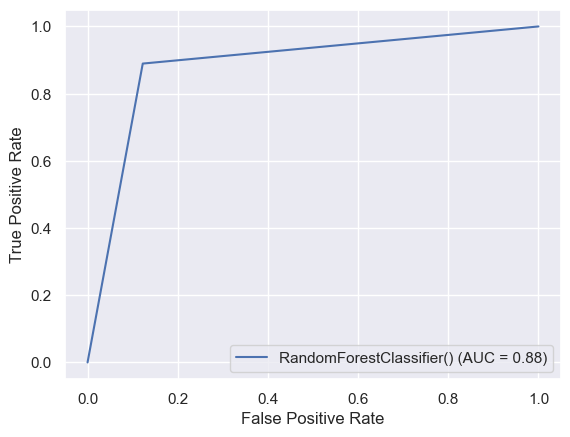

In [87]:
display.plot()

In [88]:
import joblib
joblib.dump(Final_model, "Rainfall-prediction")

['Rainfall-prediction']

In [89]:
model=joblib.load("Rainfall-prediction")

In [90]:
model.fit(x_train,y_train)
prediction=model.predict(x_test)
prediction

array([1, 0, 0, ..., 1, 0, 0])

In [91]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
3694,1,1
3695,0,0
3696,1,1
3697,0,0


# Prediction for Rainfall

In [150]:
X = df.drop("Rainfall", axis=1)
Y = df["Rainfall"]

In [151]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,0.742680,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,-0.771299,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,0.691207,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,0.152299,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,-0.275457,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,0.314924,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,0.314924,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,-0.040046,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,0.314924,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# VIF

In [152]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.602216,Location
1,8.776052,MinTemp
2,26.340651,MaxTemp
3,1.505386,Evaporation
4,1.647674,Sunshine
5,1.623987,WindGustDir
6,2.216485,WindGustSpeed
7,1.396968,WindDir9am
8,1.495284,WindDir3pm
9,1.814908,WindSpeed9am


In [153]:
# Dropping MaxTemp column
X.drop("MaxTemp",axis=1,inplace=True)

In [154]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.600105,Location
1,8.762938,MinTemp
2,1.502767,Evaporation
3,1.641266,Sunshine
4,1.623369,WindGustDir
5,2.206998,WindGustSpeed
6,1.394553,WindDir9am
7,1.494076,WindDir3pm
8,1.814058,WindSpeed9am
9,1.964154,WindSpeed3pm


In [155]:
# Dropping Pressure9am column
X.drop("Pressure9am",axis=1,inplace=True)

In [156]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.600020,Location
1,8.597799,MinTemp
2,1.489207,Evaporation
3,1.640480,Sunshine
4,1.610549,WindGustDir
5,2.187804,WindGustSpeed
6,1.372896,WindDir9am
7,1.432629,WindDir3pm
8,1.804904,WindSpeed9am
9,1.951201,WindSpeed3pm


In [157]:
# Dropping Temp9am column
X.drop("Temp9am",axis=1,inplace=True)

In [158]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.599476,Location
1,4.956734,MinTemp
2,1.484270,Evaporation
3,1.633260,Sunshine
4,1.605885,WindGustDir
5,2.166456,WindGustSpeed
6,1.372360,WindDir9am
7,1.432534,WindDir3pm
8,1.794714,WindSpeed9am
9,1.910324,WindSpeed3pm


Finding the best random state

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [160]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    LR=LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Max r2 score is: ",MaxAccu, "at random state", MaxRS)

Max r2 score is:  0.7917705295531885 at random state 151


Creating Train Test Split

In [161]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=151,test_size=.30)

In [162]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics

In [163]:
RFR_model= RandomForestRegressor()
GBR_model= GradientBoostingRegressor()
ABR_model= AdaBoostRegressor()
BGR_model= BaggingRegressor()
DTR_model= DecisionTreeRegressor()
KNN_model= KNN()

model=[RFR_model,GBR_model,ABR_model,BGR_model,DTR_model,KNN_model]

In [164]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2_Score of',m, 'is', r2_score(y_test,pred)*100)
    print('MAE of ',m, 'is', metrics.mean_absolute_error(y_test,pred))
    print('MSE of', m , 'is', metrics.mean_squared_error(y_test,pred))
    print('RMSE of',m, 'is', np.sqrt(metrics.mean_squared_error(y_test,pred)))
    print('\n')
    print('*'*100)
    print('\n')

r2_Score of RandomForestRegressor() is 86.15457625488305
MAE of  RandomForestRegressor() is 0.18234809721864853
MSE of RandomForestRegressor() is 0.1058872321436021
RMSE of RandomForestRegressor() is 0.32540318397889423


****************************************************************************************************


r2_Score of GradientBoostingRegressor() is 81.87482129848978
MAE of  GradientBoostingRegressor() is 0.2272708164565961
MSE of GradientBoostingRegressor() is 0.13861800405263613
RMSE of GradientBoostingRegressor() is 0.3723143887262969


****************************************************************************************************


r2_Score of AdaBoostRegressor() is 75.27265720461938
MAE of  AdaBoostRegressor() is 0.3284795093712896
MSE of AdaBoostRegressor() is 0.18911013018235212
RMSE of AdaBoostRegressor() is 0.43486794568276943


****************************************************************************************************


r2_Score of BaggingRegress

Cross Validation

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
for i in model:
    print('Cross Validation score of', i , 'is', cross_val_score(i,X,Y,cv=5).mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Cross Validation score of RandomForestRegressor() is 80.94775600376714


**************************************************


Cross Validation score of GradientBoostingRegressor() is 77.9989931523604


**************************************************


Cross Validation score of AdaBoostRegressor() is 71.87694642574431


**************************************************


Cross Validation score of BaggingRegressor() is 78.83168274468493


**************************************************


Cross Validation score of DecisionTreeRegressor() is 62.68839809769544


**************************************************


Cross Validation score of KNeighborsRegressor() is 71.21277097015908


**************************************************




# Hyper Parameter Tuning

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
parameters = { 'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

In [169]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [170]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [171]:
GCV.best_params_

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}

In [172]:
Final_model = RandomForestRegressor(max_leaf_nodes=9,max_depth=6, max_features=None, n_estimators=50)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('MAE value of Final model ', metrics.mean_absolute_error(y_test,pred))
print('MSE value of Final model', metrics.mean_squared_error(y_test,pred))
print("RMSE value of Final model:",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('r2_Score of Final model:',r2_score(y_test,pred)*100)

MAE value of Final model  0.24522645161020903
MSE value of Final model 0.15730873602576967
RMSE value of Final model: 0.3966216535008769
r2_Score of Final model: 79.43089015555948


Saving the model

In [173]:
import joblib
joblib.dump(Final_model, "Rainfall_pred")

['Rainfall_pred']

Predicting the saved model

In [174]:
model=joblib.load("Rainfall_pred")

In [175]:
prediction=model.predict(x_test)
prediction

array([0.1286756 , 1.79022353, 2.17662976, ..., 0.04530724, 0.126093  ,
       0.04530724])

In [176]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0.128676,1.336556
1,1.790224,1.916923
2,2.176630,2.128232
3,0.136319,0.182322
4,0.126610,0.000000
...,...,...
2392,1.777252,2.484907
2393,0.123949,0.000000
2394,0.045307,0.000000
2395,0.126093,0.336472
